## Homework 4


### Execute the below code, then answer the numbered questions.

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/car-reg-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8164 non-null   object 
 1   transmission   8106 non-null   object 
 2   state          8152 non-null   object 
 3   condition      8173 non-null   float64
 4   odometer       8178 non-null   float64
 5   auction_value  8107 non-null   float64
 6   selling_price  9055 non-null   float64
dtypes: float64(4), object(3)
memory usage: 495.3+ KB


In [2]:
from sklearn.model_selection import train_test_split
features = [x for x in df.columns if x != 'selling_price']

X = df[features]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,244
Records in test data: 1,811

Features:
make
transmission
state
condition
odometer
auction_value


Question 1: Split the features into two lists, one for the numerical features and another for the categorical features.

In [3]:
df

,make,transmission,state,condition,odometer,auction_value,selling_price
0,nissan,automatic,md,4.8,NaN,14350.0,13600.0
1,ford,automatic,mo,3.7,29398.0,17600.0,17100.0
2,ford,automatic,fl,3.2,32180.0,19100.0,17600.0
3,nissan,automatic,ca,NaN,30798.0,11950.0,10700.0
4,ford,automatic,nj,2.8,29526.0,28000.0,26100.0
...,...,...,...,...,...,...,...
9050,NaN,automatic,il,4.2,41186.0,NaN,11600.0
9051,ford,automatic,fl,NaN,38810.0,16250.0,17300.0
9052,nissan,NaN,ga,4.7,4551.0,12500.0,13800.0
9053,ford,automatic,il,4.6,33114.0,21800.0,27000.0


In [4]:
# cat_var are the variables which are having data type object and num var are the datatypes excluding that of objects. It can be a float or INT or any other datatype mostly.
cat_var = ['make','transmission','state']
num_var = [ 'condition', 'odometer',
       'auction_value']

### Question 2: Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

### Question 3: Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.


In [6]:
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

### Question 4: Combine the numerical and categorical pipelines into one data processing pipeline.

In [7]:
from sklearn.compose import ColumnTransformer
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_var),
                                                      ('create_dummies', cat_pipeline, cat_var)])

print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['condition', 'odometer', 'auction_value']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['make', 'transmission', 'state'])])


### Question 5: Add a linear regression model to the pipeline.

In [8]:
from sklearn.linear_model import LinearRegression

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LinearRegression())
                             ])
modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['condition', 'odometer',
                                                   'auction_value']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                  

In [9]:
data_predictions = modeling_pipeline.predict(X_test)

In [10]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,data_predictions)
mse

6998122.054103523

In [11]:
import numpy as np
rmse = np.sqrt(mse)
rmse

2645.396388842988

### Report what the R^2 is using the test data.

In [12]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,data_predictions)
r2

0.8838274420792979

### Question 6: Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?

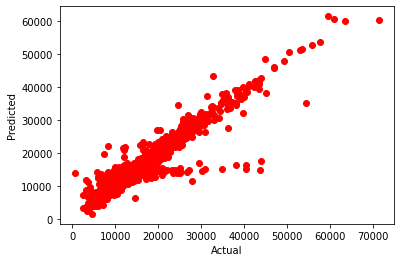

In [13]:
import matplotlib.pyplot as plt

plt.plot(y_test, data_predictions, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

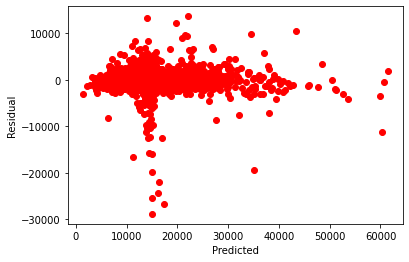

In [14]:
plt.plot(data_predictions, data_predictions - y_test, 'ro')
plt.ylabel('Residual')
plt.xlabel('Predicted')
plt.show()

Observations
1. This is a perfect model, the residuals is around 0 for most predicted values.

2. The testing data fits better than the train data. 

### Question 7: Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the ?

In [15]:
from sklearn.linear_model import Ridge

modeling_pipeline_ridge = Pipeline([('data_processing', processing_pipeline), ('ridge', Ridge(alpha=100))])
modeling_pipeline_ridge.fit(X_train, y_train)
modeling_pipeline_ridge['ridge'].coef_

array([ 9.01235380e+02, -2.21760476e+02,  6.86465341e+03, -3.12413710e+02,
       -3.72380488e+02, -3.05445419e+02, -2.69794448e+02, -1.86398005e+02,
       -7.33128946e+02, -9.05948960e+02, -6.35796586e+02, -1.86033629e+02,
       -3.33173002e+02,  3.49919821e+02,  4.21217076e+02,  3.11284609e+01,
        9.49969452e+01, -7.39997343e+01,  1.24546801e+02, -3.40506757e+02,
        2.31197544e+00, -2.35693863e+02, -4.17676766e+02,  1.34011435e+02,
       -9.59909962e+01,  4.22809984e+02,  1.16124616e+02, -1.86057720e+02,
        1.21282524e+02, -5.66385629e+01, -4.41416970e+00,  3.55832878e+02,
       -3.49303228e+02, -1.21324048e+02, -7.93074276e+01, -1.21615062e+02,
       -3.91386616e+02, -1.73769436e+02,  3.30477585e+02,  1.54770345e+02,
       -5.63228709e+01, -1.31283703e+02,  7.32283808e+00,  1.06959101e+02])

In [16]:
modeling_pipeline['lm'].coef_

array([  887.27572098,  -225.88041312,  6817.22028984, -2031.21321134,
       -2258.08086574, -2066.5174286 , -1977.60504155, -1939.85889487,
       -2645.77637362, -2881.1297511 , -2439.73350074, -1881.4890095 ,
        -550.68502515,   154.65628933,   720.37925156,  -110.31938678,
         -31.25676426,  -823.63501144,    83.03889278,  -804.3861129 ,
         -31.2631287 ,  -920.26225696,  -849.52479305,   109.44638166,
        -191.16096753,   441.92452919,   575.46182983,  -341.51288628,
         257.63433513,  -274.74444538,  -546.9509281 ,   301.0327389 ,
        -816.96419443,  -403.11084792,  -793.08276377,  -231.6489205 ,
       -1843.22787599,  -629.60194272,   347.37964617,    91.24037513,
        -454.03510666,  -295.42181553,  -100.24199182,   -27.36533369])

In [17]:
from collections import defaultdict
alphas = [0, 1, 2, 5, 10, 50]

ridge_results = defaultdict(dict)

for alph in alphas:
    modeling_pipeline_ridge = Pipeline([('data_processing', processing_pipeline), ('ridge', Ridge(alpha=alph))])
    modeling_pipeline_ridge.fit(X_train, y_train)
    ridge_results['coefficients'][alph] = modeling_pipeline_ridge['ridge'].coef_
    ridge_results['training score'][alph] = modeling_pipeline_ridge.score(X_train, y_train)
    ridge_results['test score'][alph] = modeling_pipeline_ridge.score(X_test, y_test)

print('Done')

Done


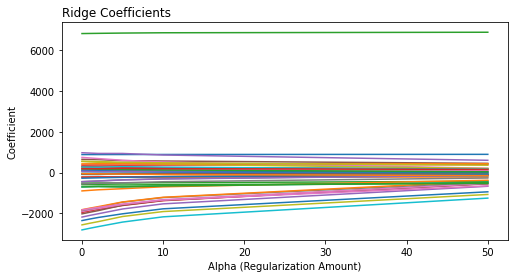

In [18]:
coefficients_ridge = pd.DataFrame.from_dict(ridge_results['coefficients'])
coefficients_ridge = coefficients_ridge.reset_index()
coefficients_ridge = coefficients_ridge.rename(columns={'index':'coefficient_nbr'})
coefficients_ridge = coefficients_ridge.melt(id_vars='coefficient_nbr', var_name='alpha', value_name='coefficient')

(
coefficients_ridge.pivot_table(index='alpha', columns='coefficient_nbr', values='coefficient')
    .plot(figsize=(8,4),legend=False)
)

plt.title('Ridge Coefficients', loc='left')
plt.xlabel('Alpha (Regularization Amount)')
plt.ylabel('Coefficient')
plt.show()

Changes in R^2


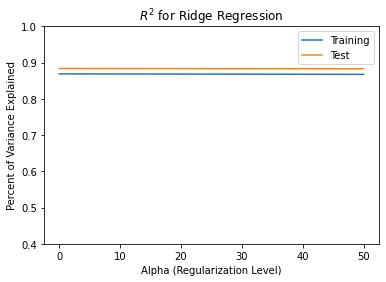

In [19]:
ridge_training_r2 = pd.Series(ridge_results['training score'])
ridge_test_r2 = pd.Series(ridge_results['test score'])

ridge_training_r2.plot()
ridge_test_r2.plot()
plt.title('$R^2$ for Ridge Regression')
plt.legend(['Training','Test'])
plt.xlabel('Alpha (Regularization Level)')
plt.ylabel('Percent of Variance Explained')
plt.ylim(0.4, 1)
plt.show()